In [2]:
!nvidia-smi

Wed Dec 27 21:42:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.4 MB/s eta 0:00:00


In [5]:
!yolo task = detect mode = train model=yolov8n-seg.pt data = '/content/drive/MyDrive/InstanceSegmentation/Dentistry.v2i.yolov8/data.yaml' epochs = 100 imgsz= 720

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/InstanceSegmentation/Dentistry.v2i.yolov8/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


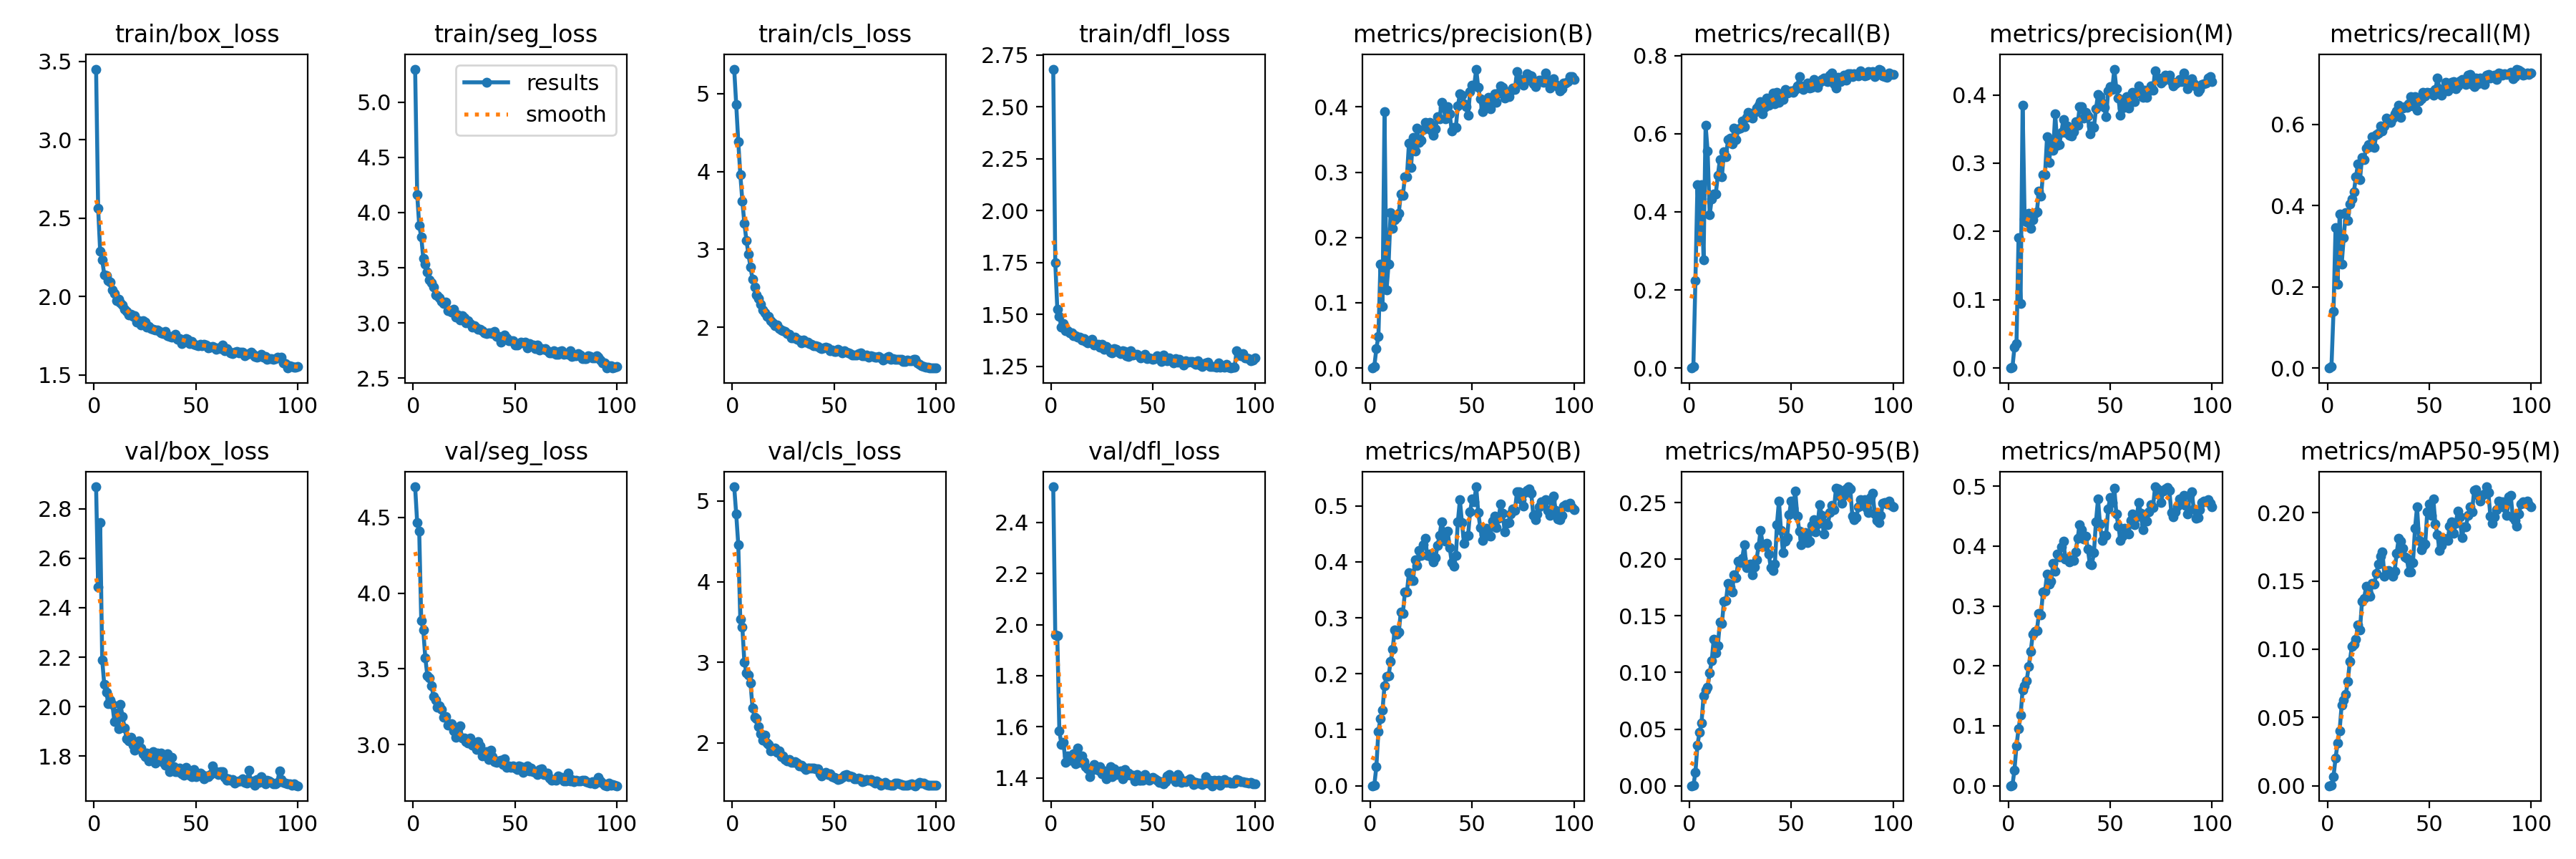

In [6]:
from IPython.display import Image
Image('/content/runs/segment/train2/results.png')

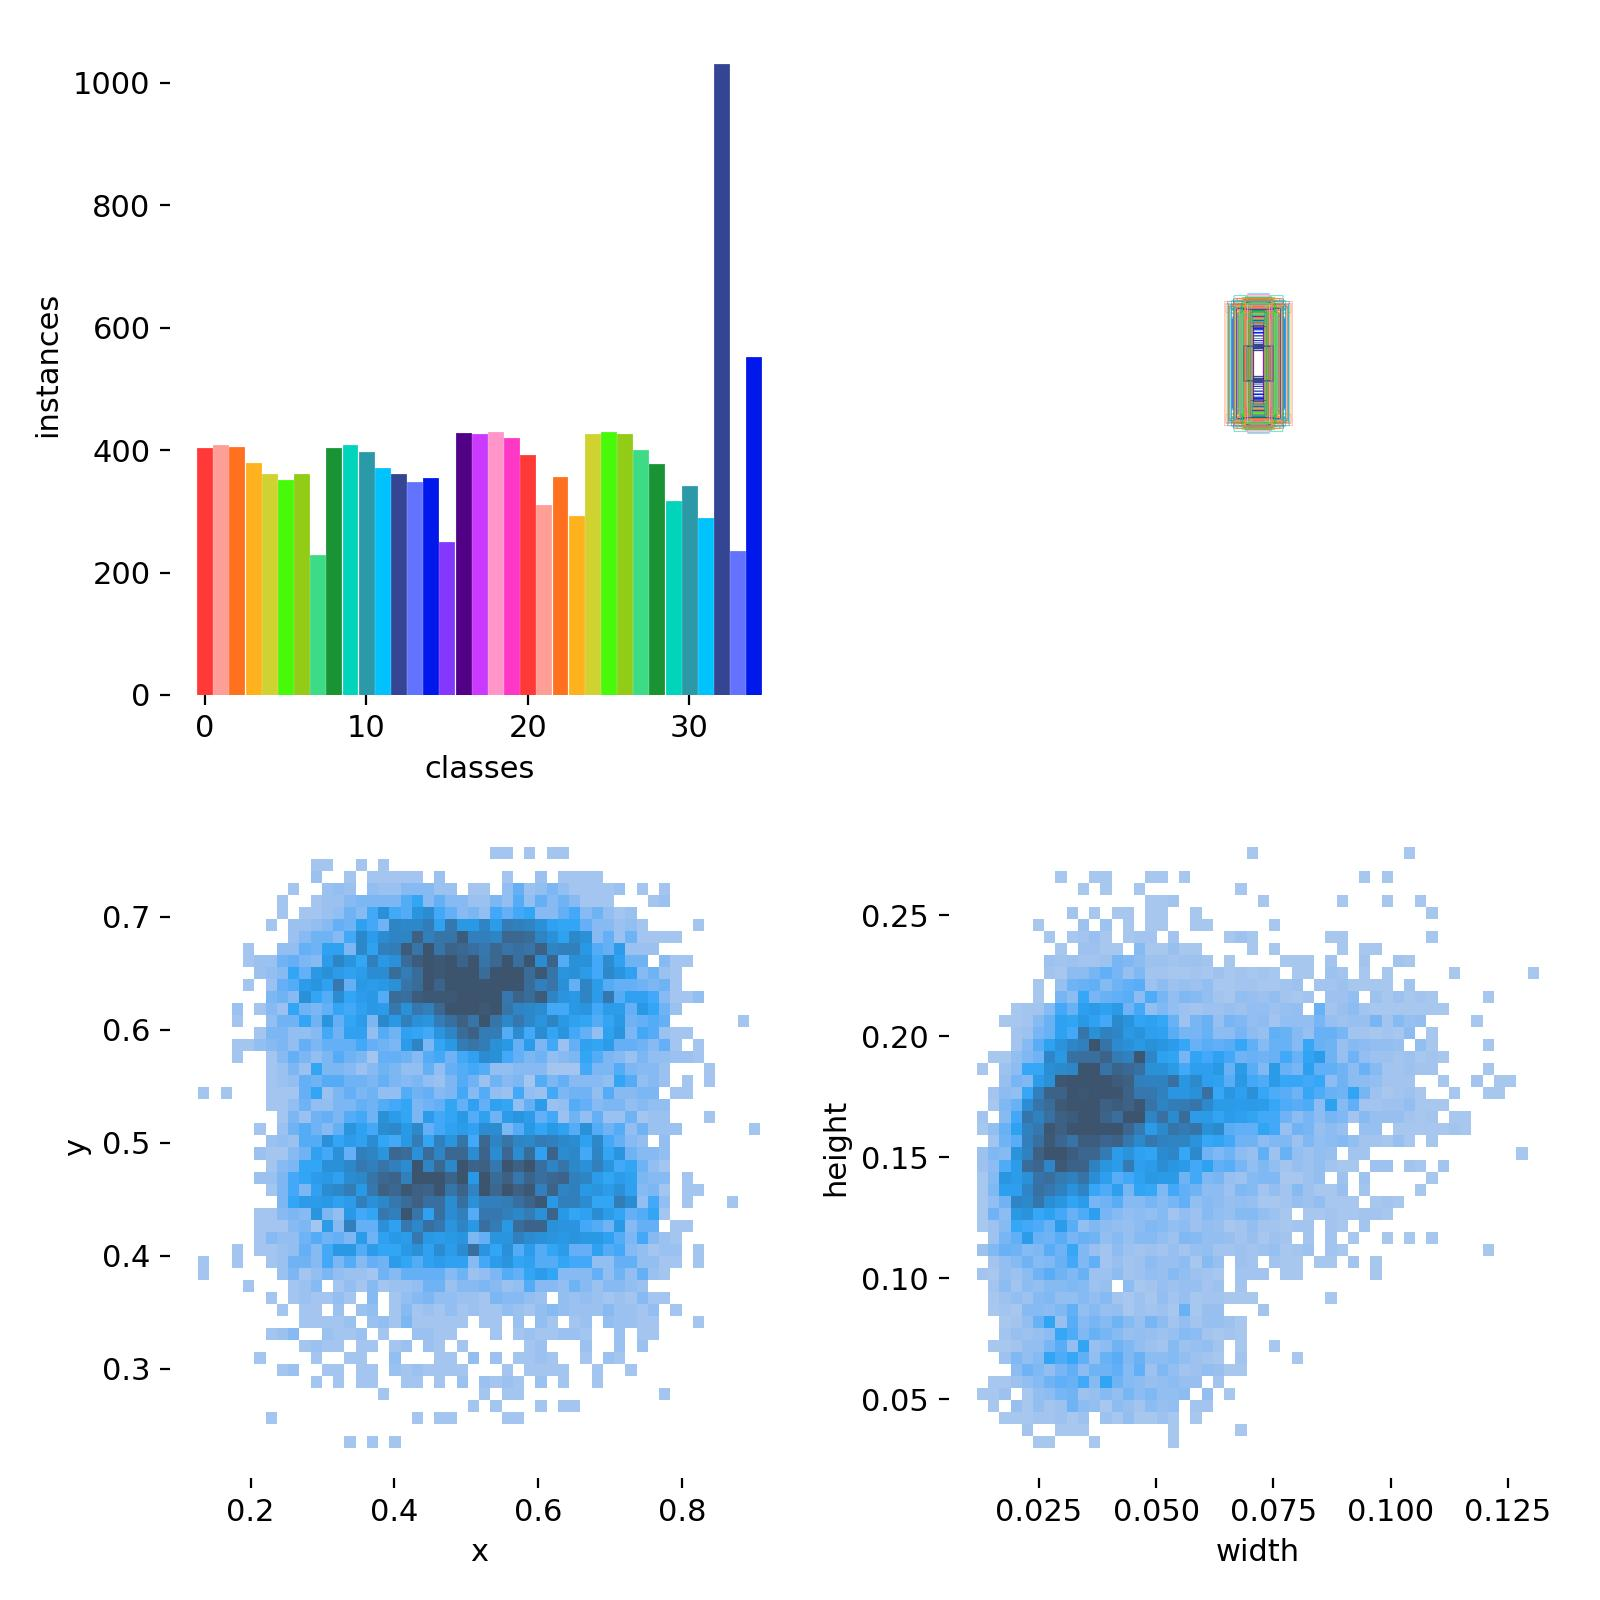

In [7]:
Image('/content/runs/segment/train2/labels.jpg')

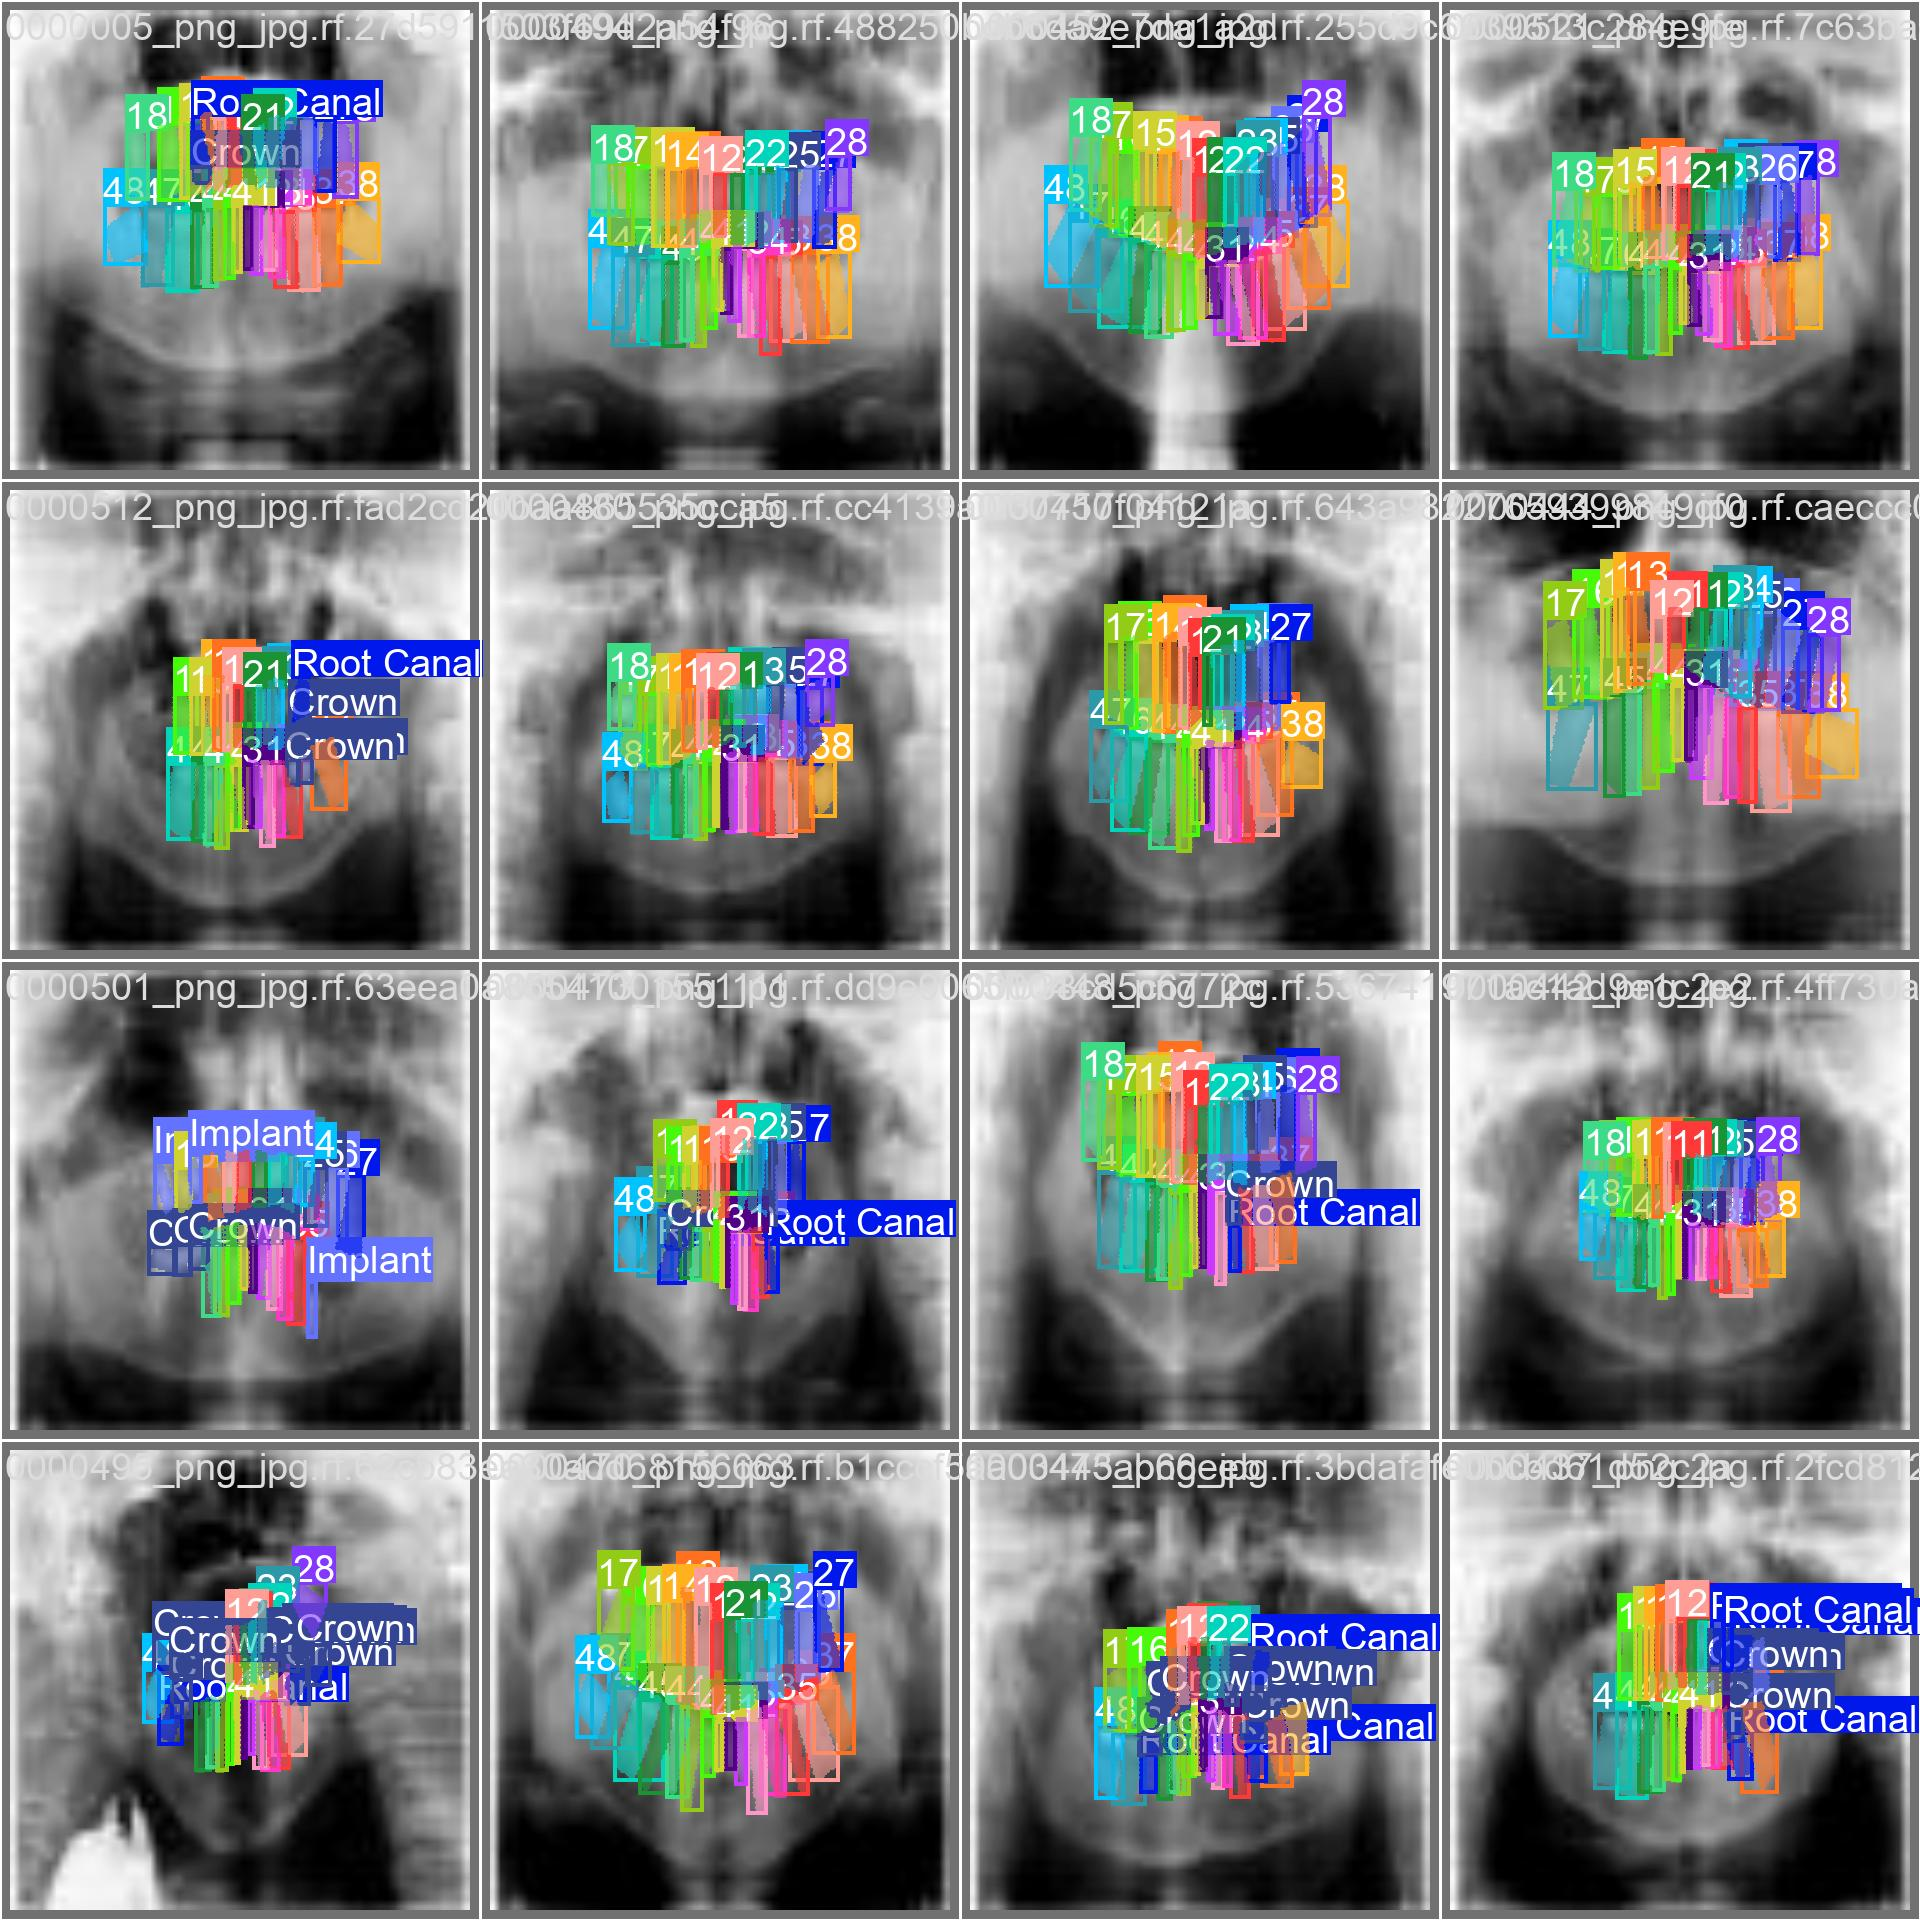

In [8]:
Image('/content/runs/segment/train2/val_batch0_labels.jpg')

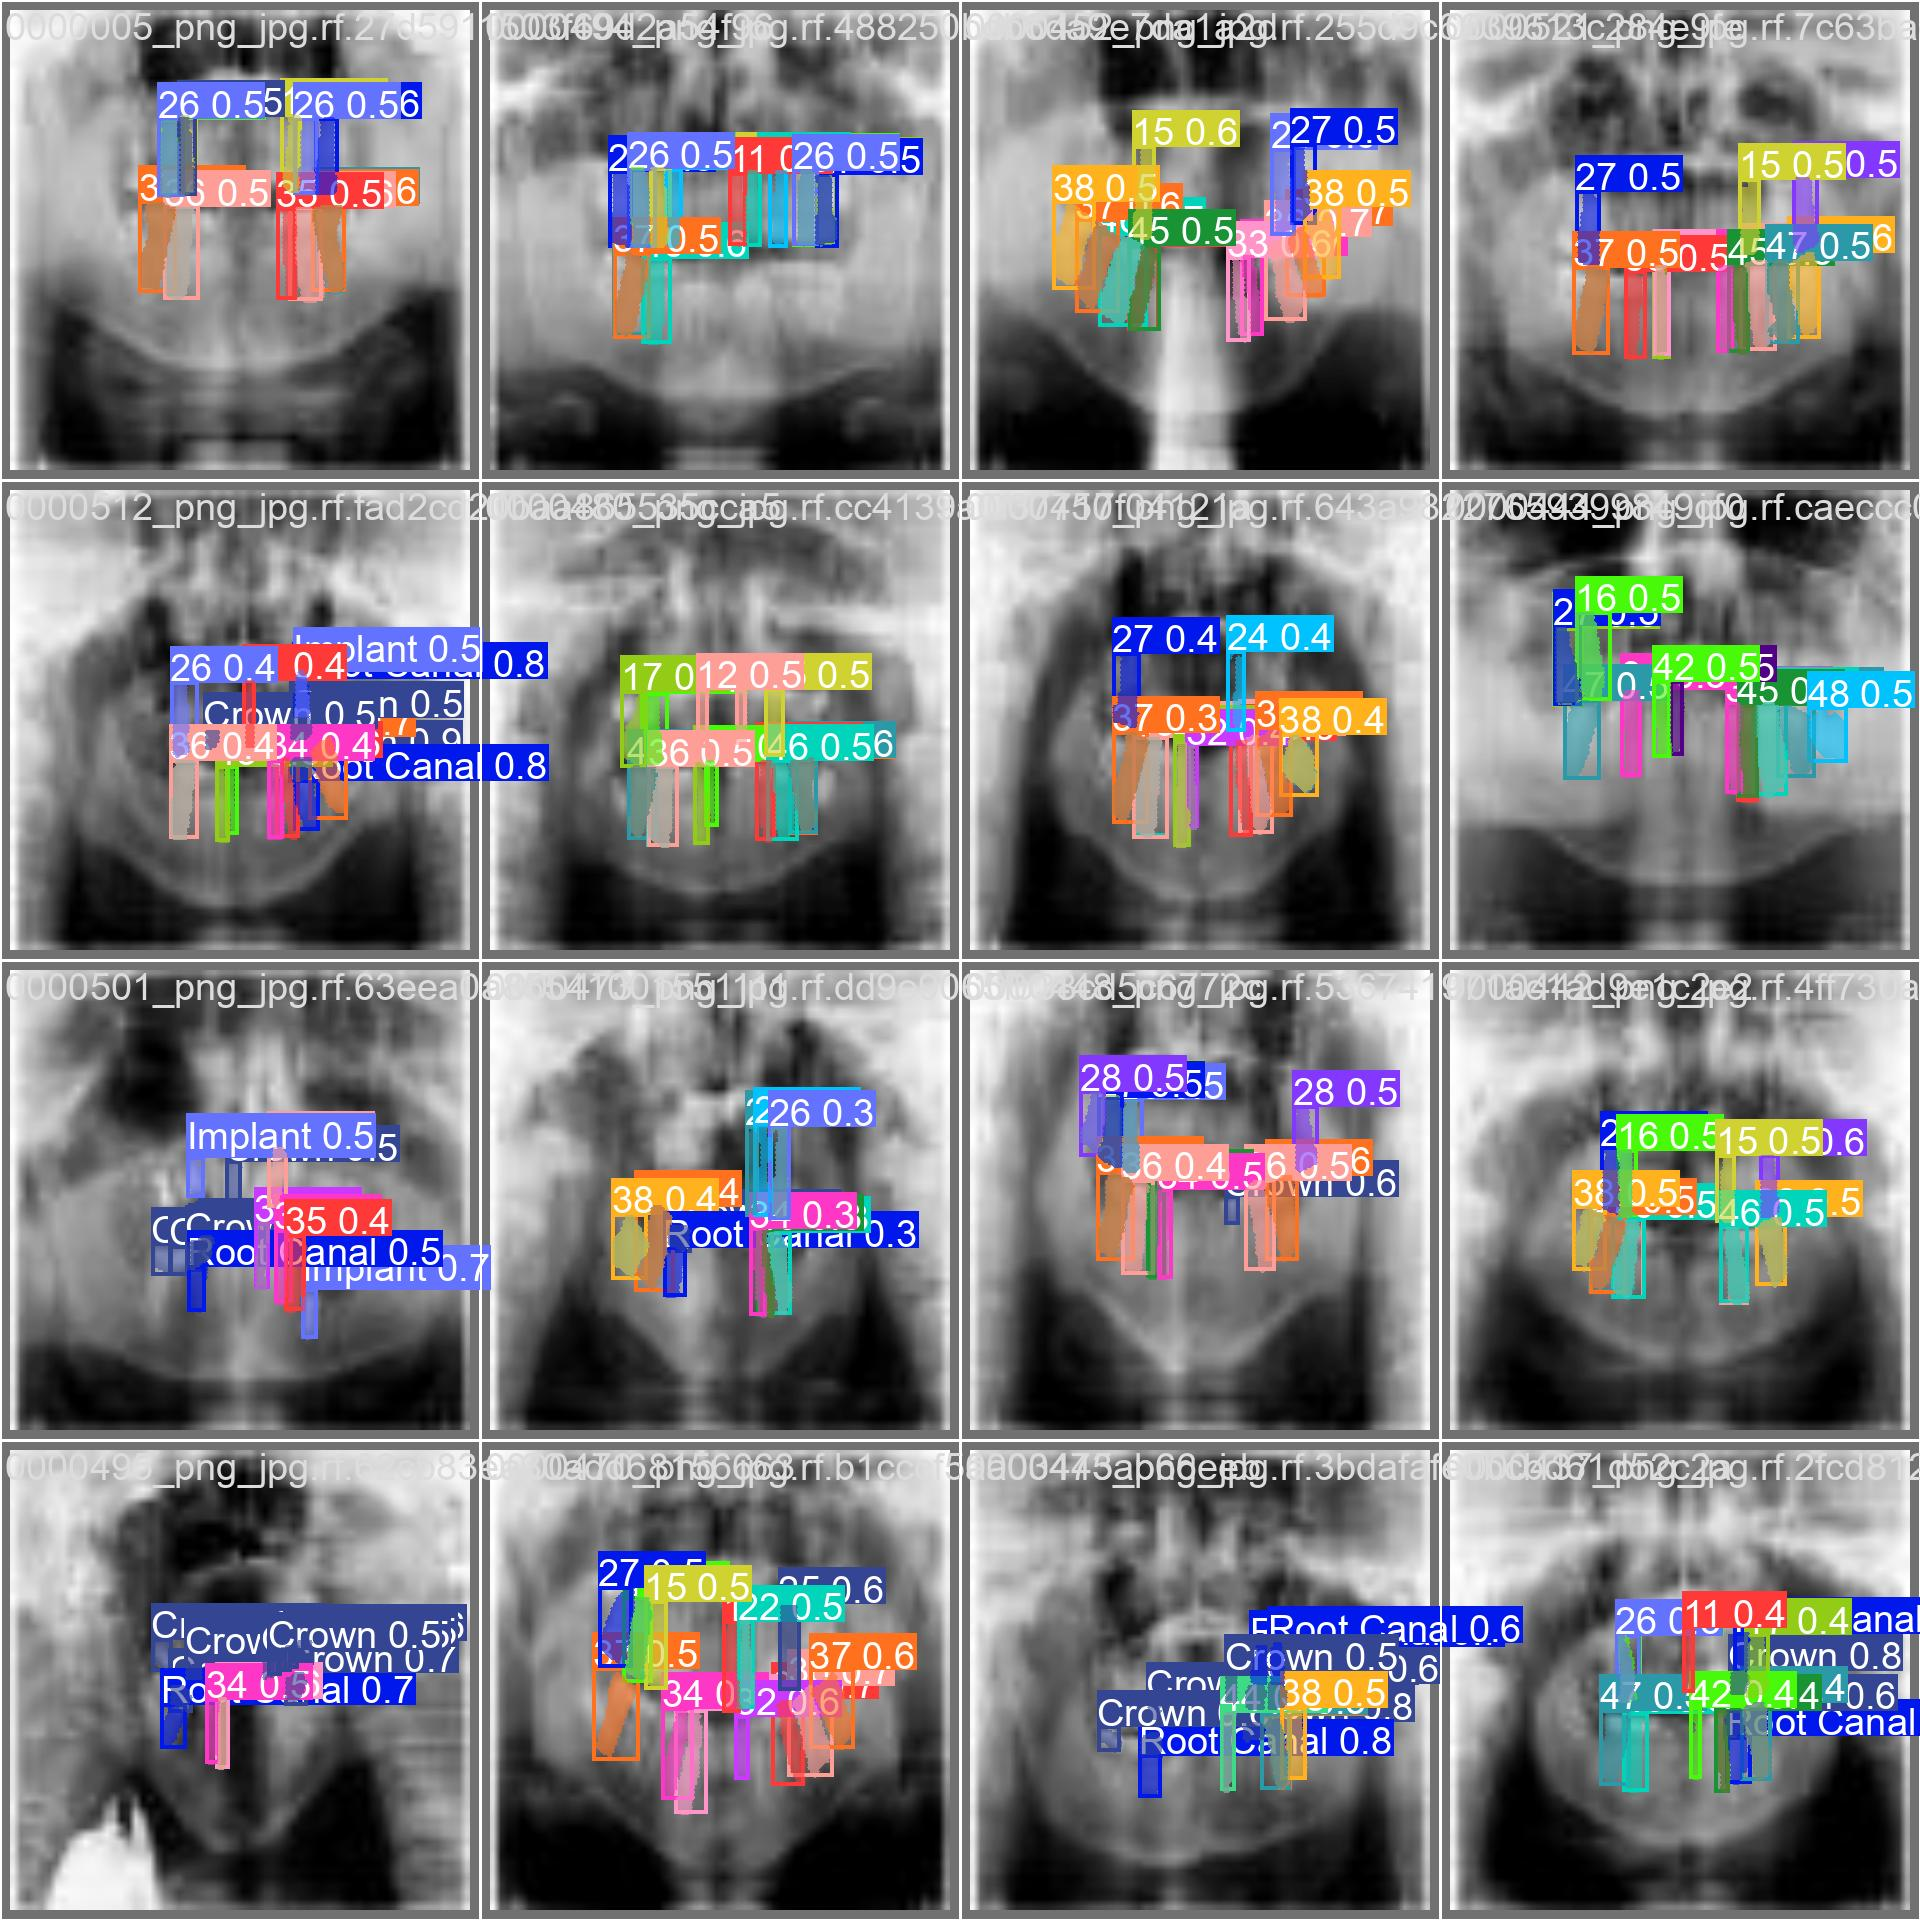

In [9]:
Image('/content/runs/segment/train2/val_batch0_pred.jpg')

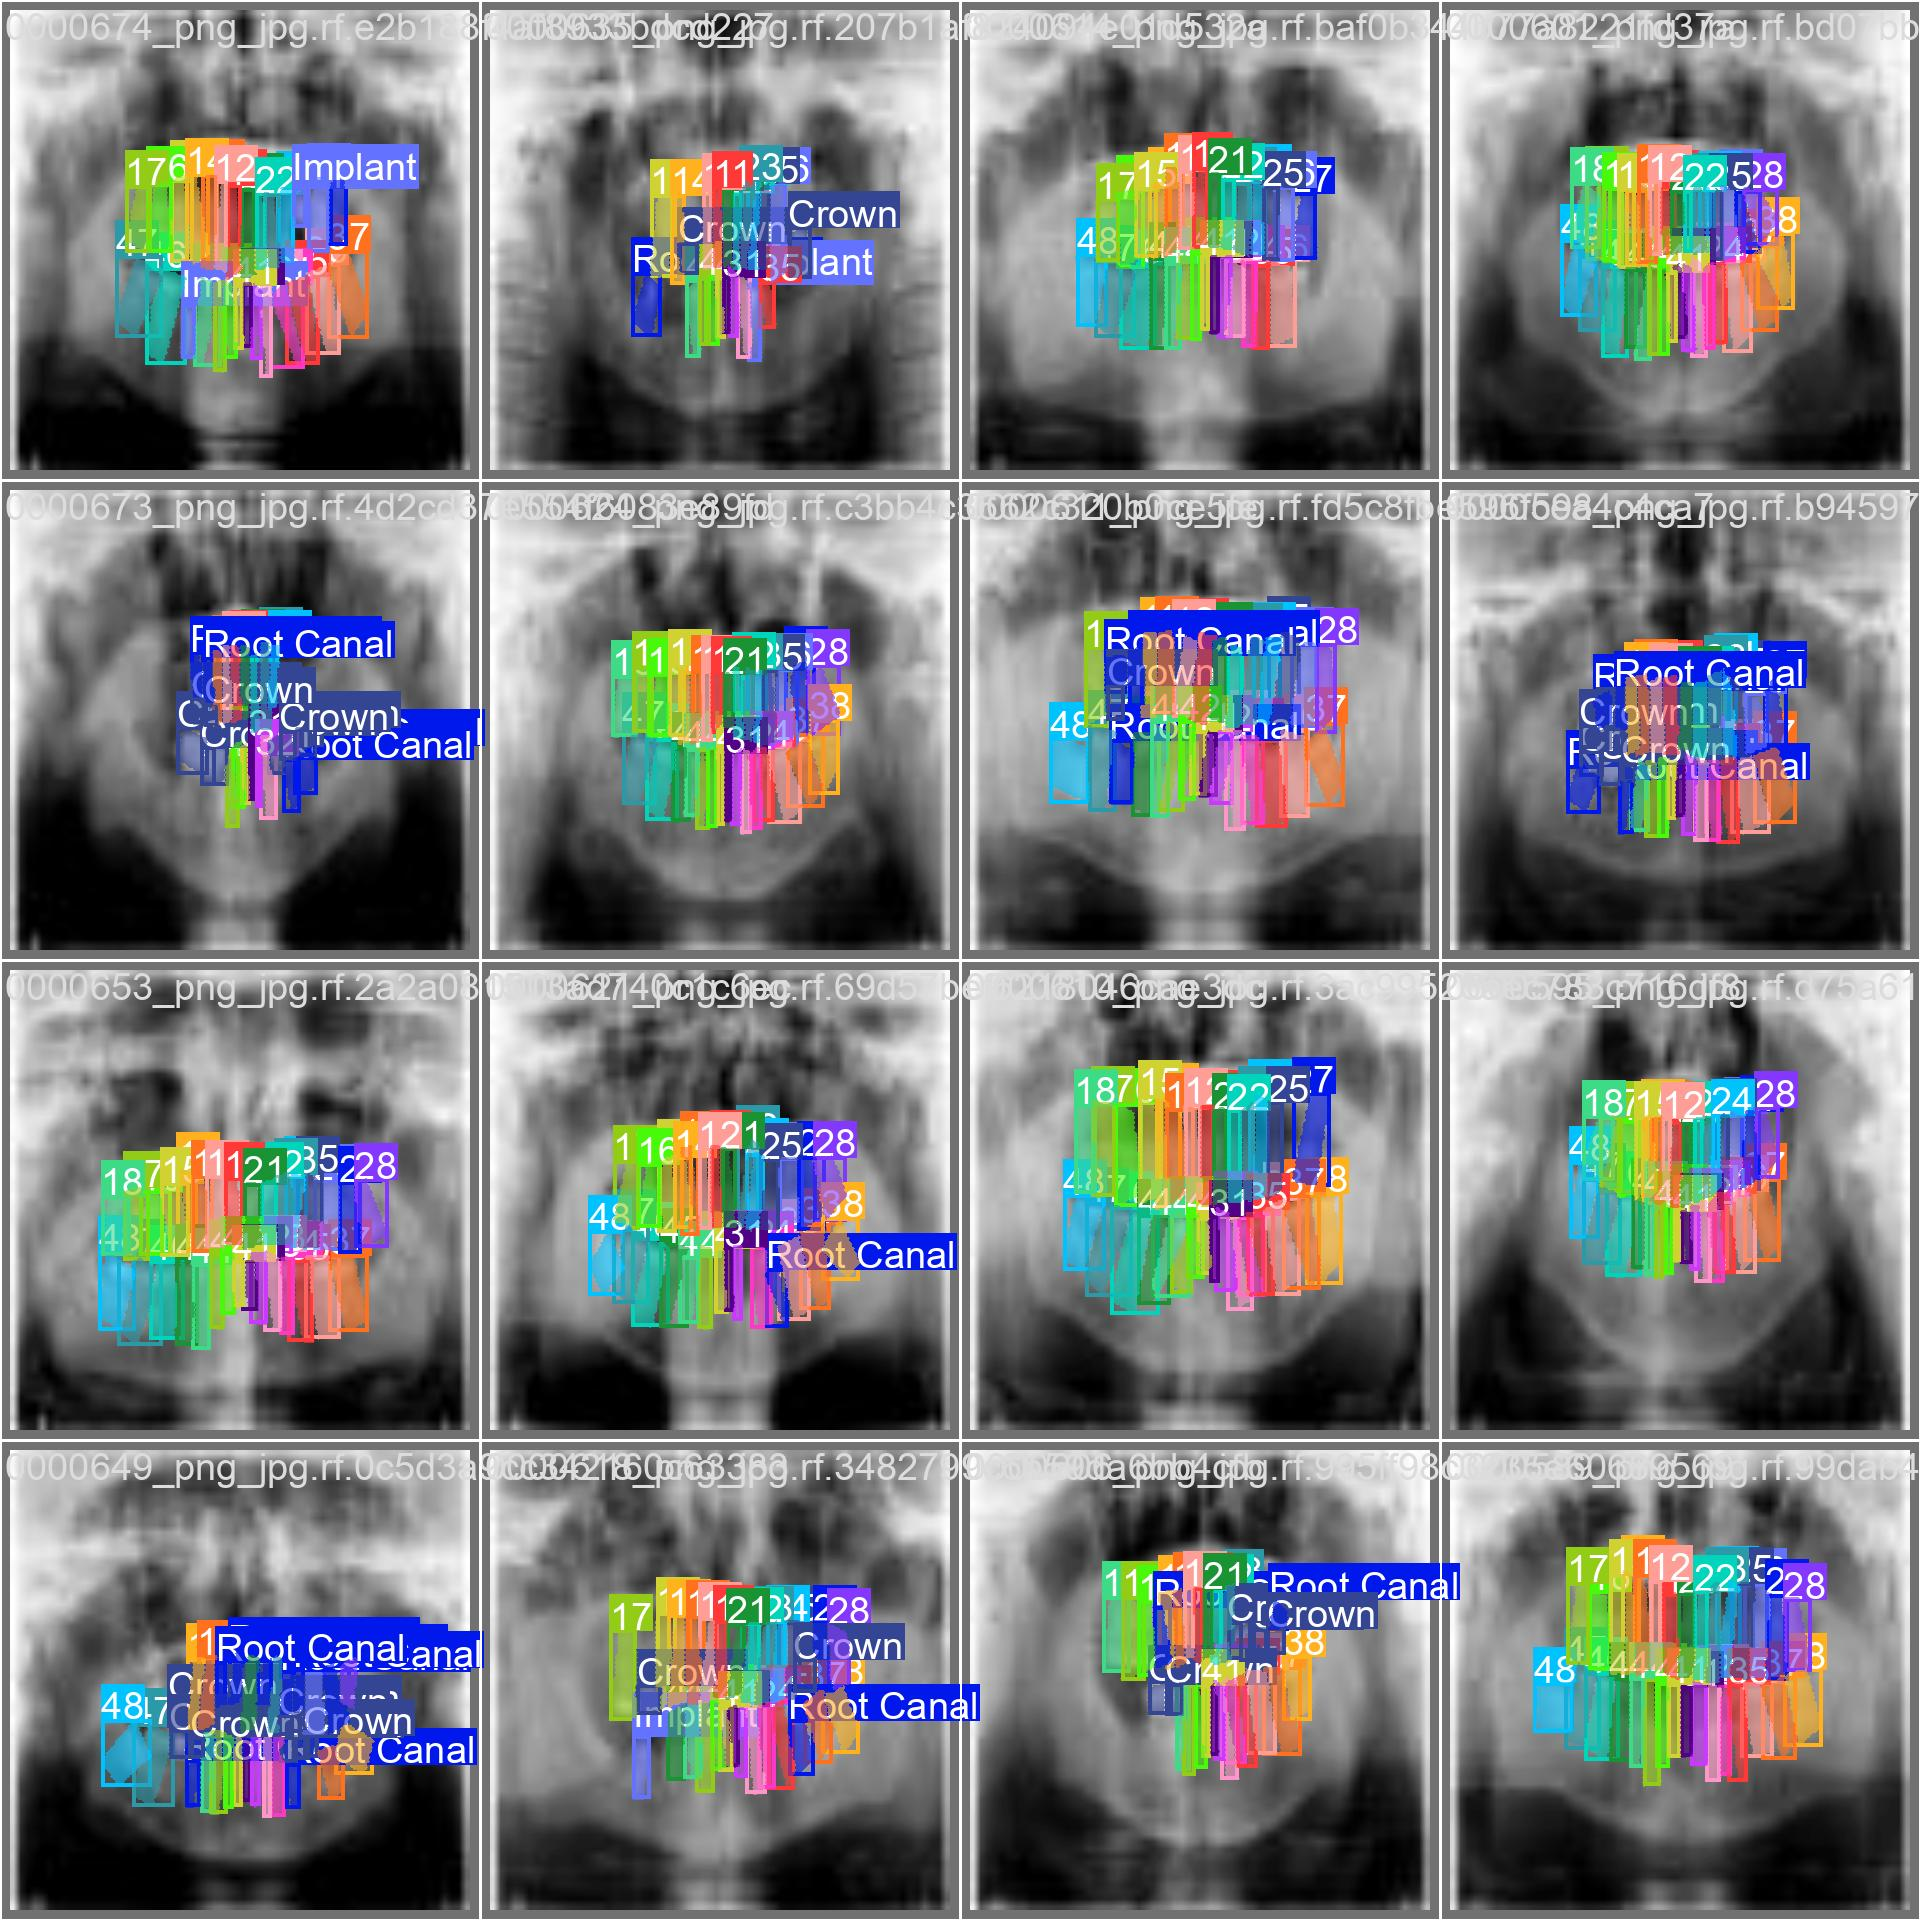

In [10]:
Image('/content/runs/segment/train2/val_batch1_labels.jpg')

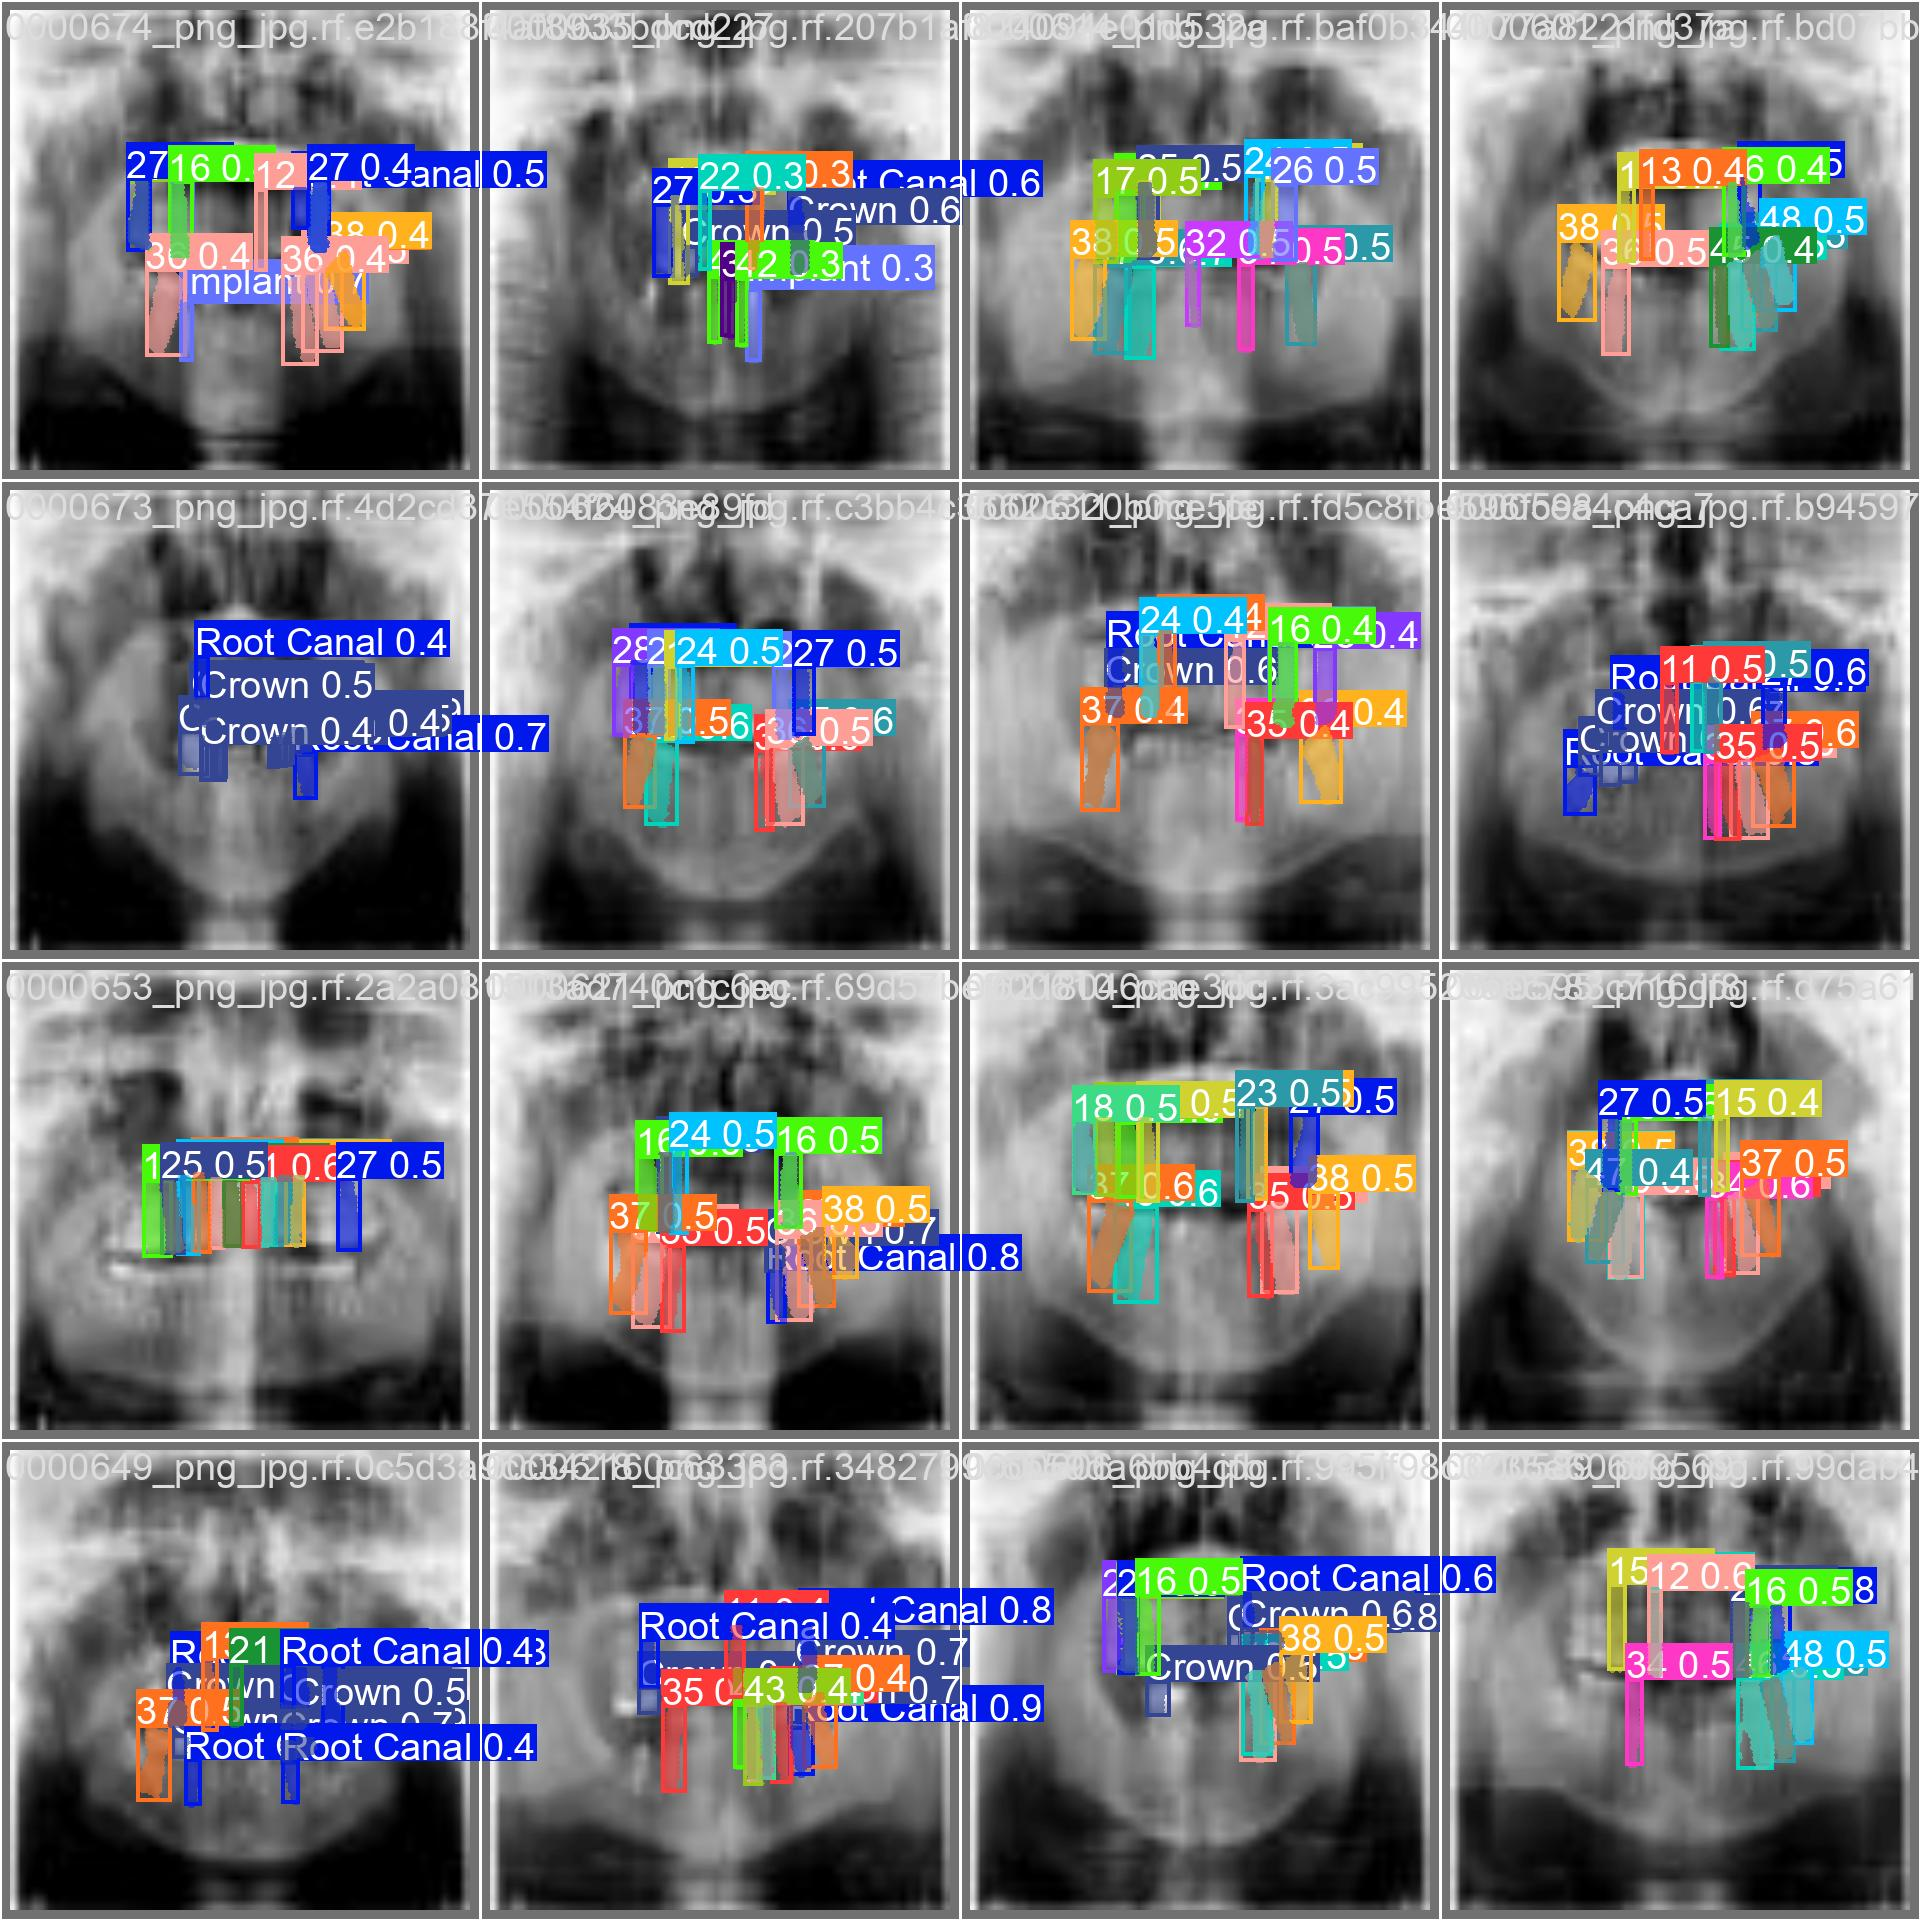

In [11]:
Image('/content/runs/segment/train2/val_batch1_pred.jpg')

In [12]:

#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/runs/segment/train2/weights

best.pt  last.pt


In [14]:
from ultralytics import YOLO
my_new_model = YOLO('/content/runs/segment/train2/weights/best.pt')

In [15]:
new_image = '/content/drive/MyDrive/InstanceSegmentation/Dentistry.v2i.yolov8/train/images/0000001_png_jpg.rf.0cd144851d07ecf2b651b731a38e17b8.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/InstanceSegmentation/Dentistry.v2i.yolov8/train/images/0000001_png_jpg.rf.0cd144851d07ecf2b651b731a38e17b8.jpg: 736x736 2 12s, 1 13, 2 14s, 2 15s, 3 16s, 2 17s, 1 22, 2 23s, 1 24, 1 25, 2 32s, 2 33s, 3 34s, 1 35, 1 41, 1 42, 1 43, 1 44, 2 45s, 1 46, 1 47, 1 Root Canal, 12.5ms
Speed: 4.9ms preprocess, 12.5ms inference, 718.4ms postprocess per image at shape (1, 3, 736, 736)


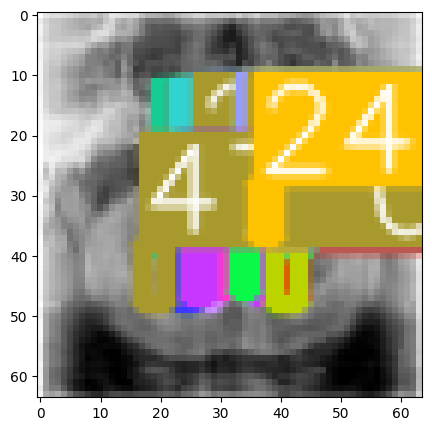

In [18]:
import matplotlib.pyplot as plt
new_result_array = new_results[0].plot()
plt.figure(figsize=(5, 5))
plt.imshow(new_result_array)

In [19]:
new_image = '/content/drive/MyDrive/InstanceSegmentation/Dentistry.v2i.yolov8/valid/images/0000036_png_jpg.rf.d13ba55d928cd4871619567963b42170.jpg'
new_results = my_new_model.predict(new_image)


image 1/1 /content/drive/MyDrive/InstanceSegmentation/Dentistry.v2i.yolov8/valid/images/0000036_png_jpg.rf.d13ba55d928cd4871619567963b42170.jpg: 736x736 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 2 24s, 1 25, 1 26, 1 27, 1 28, 3 31s, 1 32, 1 33, 2 34s, 2 35s, 1 37, 1 38, 1 41, 2 42s, 2 43s, 1 44, 1 45, 1 46, 2 47s, 1 48, 6 Crowns, 2 Root Canals, 38.3ms
Speed: 6.8ms preprocess, 38.3ms inference, 5.1ms postprocess per image at shape (1, 3, 736, 736)


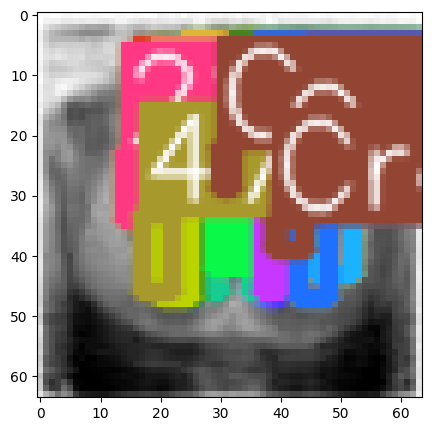

In [20]:
import matplotlib.pyplot as plt
new_result_array = new_results[0].plot()
plt.figure(figsize=(5, 5))
plt.imshow(new_result_array)